In [1]:
import networkx as nx
import sympy as sp

sp.init_printing()

from index_reduction import IndexReduction, draw_graph

%load_ext autoreload
%autoreload 2

In [2]:
def pprint(exprs, heading="expressions"):
    print(heading)
    for expr in exprs:
        display(expr)

In [3]:
# Define the symbol for time
t = sp.symbols("t")

# Define symbols
f = sp.Function("f")(t)  # make f time-varying for testing a time-varying parameter

# Define functions of time
x0 = sp.Function("x_0")(t)
x1 = sp.Function("x_1")(t)
x2 = sp.Function("x_2")(t)
x3 = sp.Function("x_3")(t)
y0 = sp.Function("y_0")(t)
y1 = sp.Function("y_1")(t)


# knowns
knowns = []

# Define the derivatives of these functions with respect to time
x0_dot = x0.diff(t)
x1_dot = x1.diff(t)
x2_dot = x2.diff(t)
x3_dot = x3.diff(t)


# Define equations
eq0 = x2_dot - x3_dot + y1
eq1 = x0_dot - x1_dot - y0 + y1
eq2 = x1_dot + x2_dot
eq3 = x0_dot - x2_dot - y0
eq4 = x1_dot - y1
eq5 = x2_dot - y1


# Equations list
eqs = [eq0, eq1, eq2, eq3, eq4, eq5]

# pprint(eqs, "Equations")

In [4]:
ir = IndexReduction(t, eqs, knowns, notebook=True)

In [5]:
ir.x

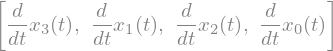

In [6]:
ir.x_dot

In [7]:
ir.y

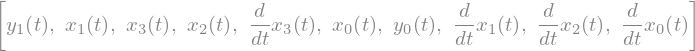

In [8]:
ir.X

In [9]:
ir.A

[None, 7, 4, 8, None, 9, None, None, None, None]

In [10]:
ir.M

In [11]:
ir.N

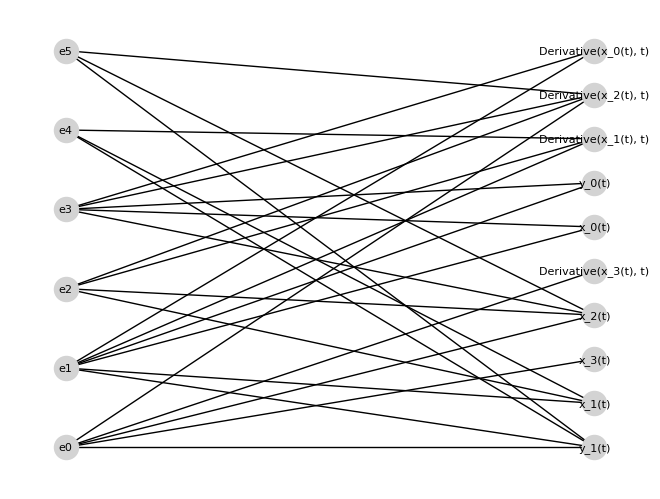

In [12]:
draw_graph(ir.G)

In [13]:
ir.pantelides()

# Panteides Algorithm Completed 

Total equations (before|after): 6|6
Total variables (before|after): 10|10


Variables 

[y_1(t), x_1(t), x_3(t), x_2(t), Derivative(x_3(t), t), x_0(t), y_0(t), Derivative(x_1(t), t), Derivative(x_2(t), t), Derivative(x_0(t), t)]


Equations 

y_1(t) + Derivative(x_2(t), t) - Derivative(x_3(t), t)
-y_0(t) + y_1(t) + Derivative(x_0(t), t) - Derivative(x_1(t), t)
Derivative(x_1(t), t) + Derivative(x_2(t), t)
-y_0(t) + Derivative(x_0(t), t) - Derivative(x_2(t), t)
-y_1(t) + Derivative(x_1(t), t)
-y_1(t) + Derivative(x_2(t), t)


# Variable assignments
Variable y_1(t) is assigned to -> e5
Variable x_1(t) is assigned to -> 
Variable x_3(t) is assigned to -> 
Variable x_2(t) is assigned to -> 
Variable Derivative(x_3(t), t) is assigned to -> e0
Variable x_0(t) is assigned to -> 
Variable y_0(t) is assigned to -> e1
Variable Derivative(x_1(t), t) is assigned to -> e4
Variable Derivative(x_2(t), t) is assigned to -> e2
Variable Derivative(x_0(t), t) is assigned

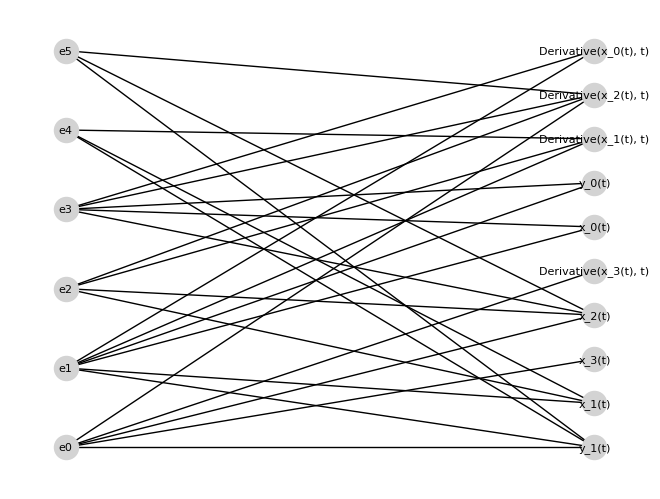

In [14]:
draw_graph(ir.G)

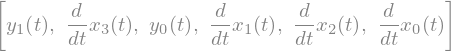

In [15]:
ir.pantelides_vars

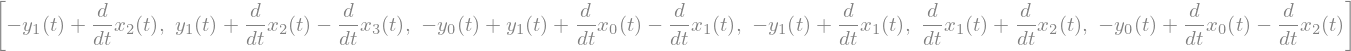

In [16]:
ir.pantelides_eqs

In [17]:
ir.pantelides_removed_eqs

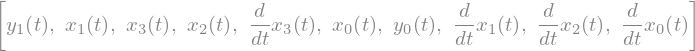

In [18]:
ir.X

In [19]:
ir.make_BLT_graph()

equation e0 is matched to variable v4
and contains the following variables: {y_1(t), Derivative(x_3(t), t), Derivative(x_2(t), t)}
with indices: [0, 4, 8] 

equation e1 is matched to variable v6
and contains the following variables: {y_1(t), y_0(t), Derivative(x_1(t), t), Derivative(x_0(t), t)}
with indices: [0, 6, 7, 9] 

equation e2 is matched to variable v8
and contains the following variables: {Derivative(x_1(t), t), Derivative(x_2(t), t)}
with indices: [7, 8] 

equation e3 is matched to variable v9
and contains the following variables: {y_0(t), Derivative(x_2(t), t), Derivative(x_0(t), t)}
with indices: [6, 8, 9] 

equation e4 is matched to variable v7
and contains the following variables: {y_1(t), Derivative(x_1(t), t)}
with indices: [0, 7] 

equation e5 is matched to variable v0
and contains the following variables: {y_1(t), Derivative(x_2(t), t)}
with indices: [0, 8] 

BLT equation ordering
['e2', 'e4', 'e5', 'e0', 'e1', 'e3']
BLT variable ordering
[Derivative(x_2(t), t), Deriv

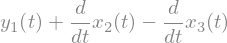

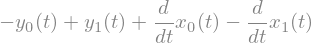

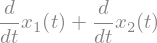

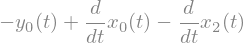

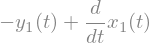

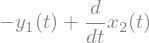

In [20]:
for eq in eqs:
    display(eq)

In [21]:
ir.BLT_graph

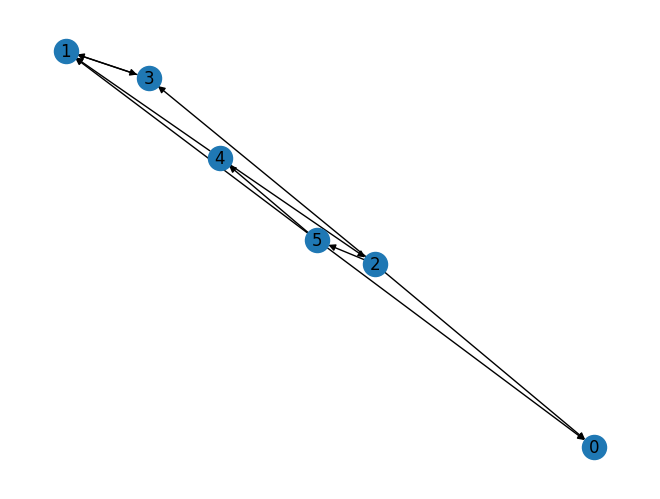

In [22]:
nx.draw(ir.BLT_graph, with_labels=True)

In [23]:
ir.BLT

In [24]:
ir.dummy_derivatives()

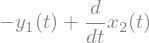

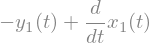

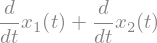

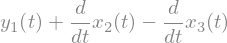

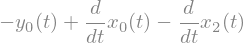

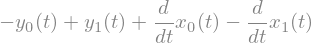

In [25]:
for eq in ir.final_dae_eqs:
    display(eq)

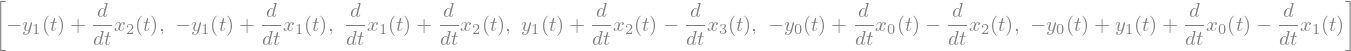

In [26]:
ir.final_dae_eqs